In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
ads=pd.read_csv("bank.csv")
new = ads[['age', 'balance', 'housing']]
new.head()

,age,balance,housing
0,59,2343,yes
1,56,45,no
2,41,1270,yes
3,55,2476,yes
4,54,184,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(new['housing'])
print("Original:", new['housing'])
print("Encoded :", encoded)
new.iloc[:,-1]=encoded

Original: 0        yes
1         no
2        yes
3        yes
4         no
        ... 
11157    yes
11158     no
11159     no
11160     no
11161     no
Name: housing, Length: 11162, dtype: object
Encoded : [1 0 1 ... 0 0 0]


In [ ]:
new.head()

,age,balance,housing
0,59,2343,1
1,56,45,0
2,41,1270,1
3,55,2476,1
4,54,184,0


# Train test split

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(new.drop('housing',axis=1),new['housing'],test_size=0.3,random_state=0)

In [ ]:
x_train.shape,x_test.shape


((7813, 2), (3349, 2))

# StandardScaler|

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
scaler.mean_

array([  41.25726354, 1512.44861129])

In [ ]:
x_train.head(2)


,age,balance
2265,55,1662
1525,39,-3058


In [ ]:
x_train_scaled

array([[ 1.153016  ,  0.0484127 ],
       [-0.18938448, -1.47954333],
       [ 0.81741588,  0.48964238],
       ...,
       [-0.44108457, -0.43166332],
       [-0.86058472, -0.47212825],
       [ 1.57251615,  0.02445746]])

In [ ]:
# scaled data is nparray,change it to dataframe
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [ ]:
np.round(x_train.describe(),1)

,age,balance
count,7813.0,7813.0
mean,41.3,1512.4
std,11.9,3089.3
min,18.0,-6847.0
25%,32.0,127.0
50%,39.0,549.0
75%,49.0,1684.0
max,95.0,66653.0


In [ ]:
np.round(x_train_scaled.describe(),1)

,age,balance
count,7813.0,7813.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-2.7
25%,-0.8,-0.4
50%,-0.2,-0.3
75%,0.6,0.1
max,4.5,21.1


# Effect of Scaling


Text(0.5, 1.0, 'after scaling')

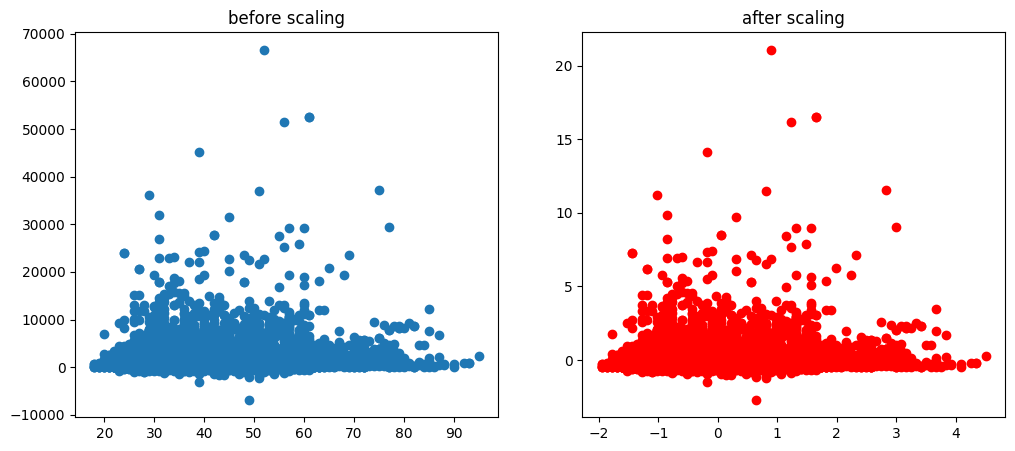

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['age'],x_train['balance'])
ax1.set_title("before scaling")
ax2.scatter(x_train_scaled['age'],x_train_scaled['balance'],color='r')
ax2.set_title("after scaling")

Text(0.5, 1.0, 'after scaling')

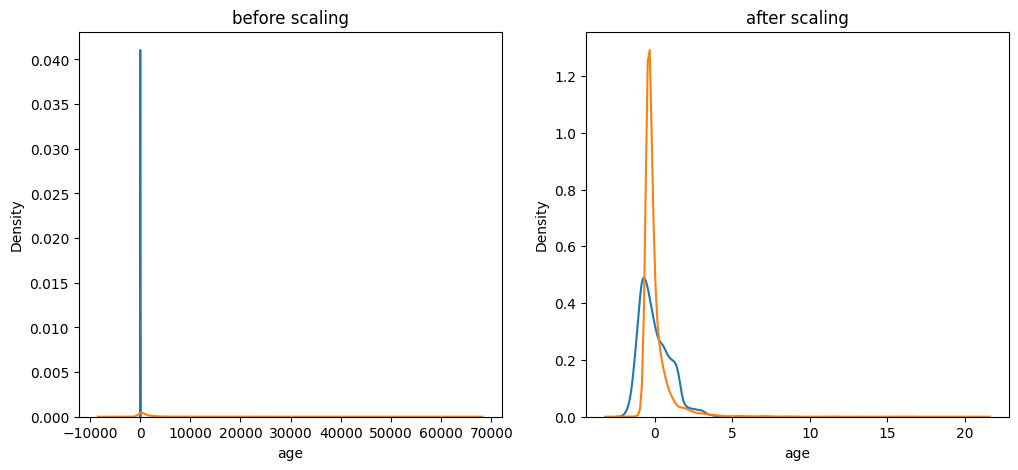

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train['age'],ax=ax1)
sns.kdeplot(x_train['balance'],ax=ax1)
ax1.set_title("before scaling")
sns.kdeplot(x_train_scaled['age'],ax=ax2)
sns.kdeplot(x_train_scaled['balance'],ax=ax2)
ax2.set_title("after scaling")

# Individual comparison of distributions

Text(0.5, 1.0, 'Age distribution after scaling')

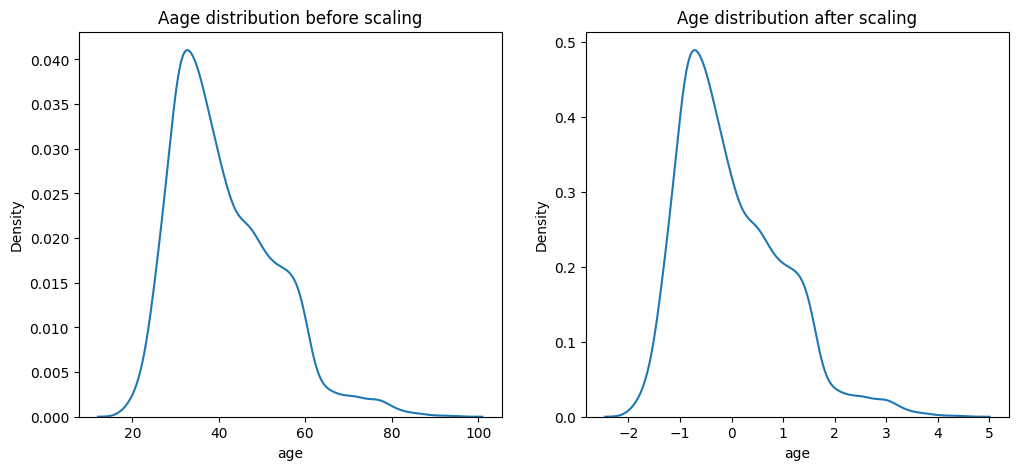

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train['age'],ax=ax1)
ax1.set_title("Aage distribution before scaling")
sns.kdeplot(x_train_scaled['age'],ax=ax2)
ax2.set_title("Age distribution after scaling")

Text(0.5, 1.0, 'Salary Distribution after scaling')

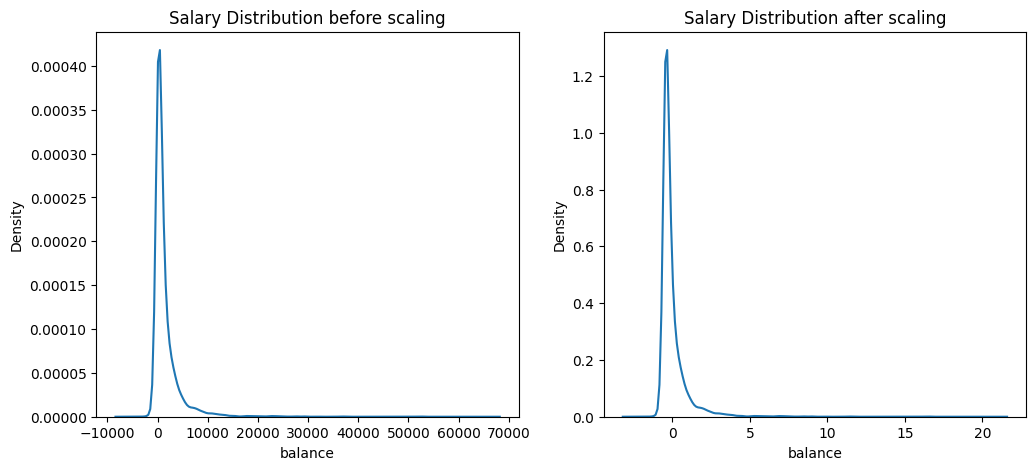

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train['balance'],ax=ax1)
ax1.set_title("Salary Distribution before scaling")
sns.kdeplot(x_train_scaled['balance'],ax=ax2)
ax2.set_title("Salary Distribution after scaling")

# Why Scaling is Important


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()
y_train = y_train.astype(int)
y_test = y_test.astype(int)
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.5538966855777844
Scaled 0.5538966855777844


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, preds):.2f}")


Random Forest Accuracy: 0.58

XGBoost Accuracy: 0.59

SVM Accuracy: 0.53

KNN Accuracy: 0.58


In [ ]:
## for scaled data
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, preds):.2f}")


Random Forest Accuracy: 0.58

XGBoost Accuracy: 0.59

SVM Accuracy: 0.59

KNN Accuracy: 0.56
